In [1]:
import os
import pandas as pd
from classes.section import Section
from classes.station import Station

def get_sta(row):
    return Station(
        chord = row['chord'],
        twist_angle = row['twist_angle'],
        x_offset = row['offset_x'],
        y_offset = row['offset_y'],
        z_offset = row['offset_z'],
        x_multiplier = row['multiplier_x'],
        y_multiplier = row['multiplier_y'],
        z_multiplier = row['multiplier_z'],
        x_mirror = row['mirror_x'],
        y_mirror = row['mirror_y'],
        path = os.path.join(os.getcwd(),'airfoils',f'{row['airfoil']}.txt'),
    )

def get_sec(row):
    return Section(
        station = stations[row.name],
        n_plies = row['n_plies'],
        ply_thickness = row['ply_thickness'],
        overlap_target = row['overlap_target'],
        te_thickness = row['te_thickness'],
        bond_thickness = row['bond_thickness'],
        genFig = row['genFig'],
        saveFig = row['saveFig'],
        tolerance = row['tolerance'],
    )

data_sta = pd.read_csv(f'resources\\data.txt')
data_sec = pd.read_csv(f'resources\\data_sec.txt')
data_jig = pd.read_csv(f'resources\\data_jig.txt')

stations = data_sta.apply(get_sta, axis=1).tolist()

data_sec['bond_thickness'] = 3
data_sec['overlap_target'] = data_sec['overlap_target'] * data_sta['chord']
data_jig['overlap_dist'] = data_jig['overlap_dist'] * data_sta['chord']

sections = data_sec.apply(get_sec,axis=1).tolist()

- Completed in 0.477s.

- Completed in 0.552s.

- Completed in 0.555s.

- Completed in 0.602s.

- Completed in 0.509s.

- Completed in 0.606s.

- Completed in 0.564s.

- Completed in 0.650s.

- Completed in 0.446s.

- Completed in 0.545s.

- Completed in 0.710s.



In [2]:
sections[2].info()

Station instance name: skin_1500
Parameters: ['n_plies', 'ply_thickness', 'overlap_target', 'te_thickness', 'bond_thickness', 'saveFig', 'base_airfoil', 'z', 'twist_angle', 'isCircle', 'colours']
Guides: ['chord', 'overlap_offset', 'overlap_start', 'TE']
Indexes: ['ply_cut_bot', 'ply_cut_top', 'LE', 'olp_sta', 'top_sta', 'te_bot', 'idx_te_top']
t-parameters: ['bot_ref', 'bot_splines', 'bot_plies', 'top_ref', 'top_splines', 'top_plies']
CubicSplines: [0, 1, 2]
Points: ['bot_1', 'top_1']
Figures: ['section', 'bottom', 'bottom_trim', 'top', 'top_trim']


In [3]:
for x in range(len(sections)):
    if data_jig['bond_thickness'][x] != 0:
        sections[x].jiggle(overlap_dist = data_jig['overlap_dist'][x], bond_thickness = 3)

for x in range(len(sections)):
    if data_jig['bond_thickness'][x] != 0:
        sections[x].teSpar(te_distance=220, thickness=1, flange_distance=50, n_tePlies=1)

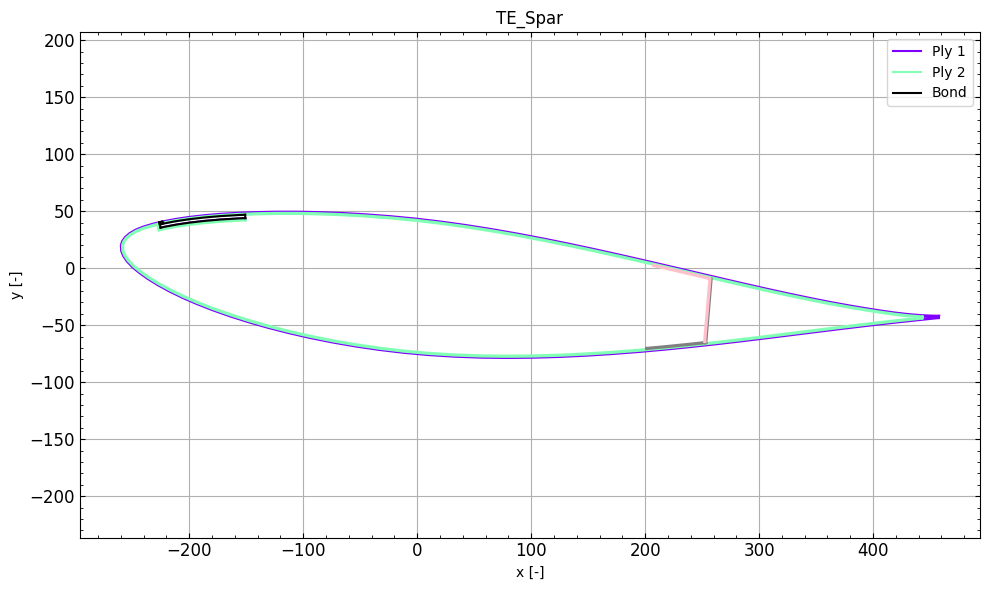

In [4]:
sections[-1].figs['TE_spar']

In [15]:
# Skin

z_all = data_sta['offset_z'].tolist()

for side in ['top','bot']:
    for i in range(len(z_all)):
        for spline in [1]:
            x = sections[i].points[f'{side}_1'][2][spline]['x']
            y = sections[i].points[f'{side}_1'][2][spline]['y']
            z = [z_all[i]] * len(x)

            df = pd.DataFrame({'x':x,'y':y,'z':z})

            df.to_csv(
                f'tests\\blade_03\\solidworks\\skin\\{side}_{z_all[i]}_{spline}.txt', 
                index = False, 
                header = False,
            )

In [8]:
# Rear Spar

z_all = data_sta['offset_z'].tolist()

for i in range(2,len(z_all)):
    for spline in [0,1]:
        x = sections[i].points['te_spar'][1][1][1][spline]['x']
        y = sections[i].points['te_spar'][1][1][1][spline]['y']
        z = [z_all[i]] * len(x)

        df = pd.DataFrame({'x':x,'y':y,'z':z})

        df.to_csv(
            f'tests\\blade_03\\solidworks\\tesp\\tesp_{z_all[i]}_{spline}.txt', 
            index = False, 
            header = False,
        )

Station instance name: skin_1500
Parameters: ['n_plies', 'ply_thickness', 'overlap_target', 'te_thickness', 'bond_thickness', 'saveFig', 'base_airfoil', 'z', 'twist_angle', 'isCircle', 'colours']
Guides: ['chord', 'overlap_offset', 'overlap_start', 'TE', 'overlap_end', 'te_spar', 'te_spar_flange']
Indexes: ['ply_cut_bot', 'ply_cut_top', 'LE', 'olp_sta', 'top_sta', 'te_bot', 'idx_te_top']
t-parameters: ['bot_ref', 'bot_splines', 'bot_plies', 'top_ref', 'top_splines', 'top_plies', 'bot_3', 'bot_1']
CubicSplines: [0, 1, 2]
Points: ['bot_1', 'top_1', 'bot_2', 'bot_3', 'bond', 'te_spar']
Figures: ['section', 'bottom', 'bottom_trim', 'top', 'top_trim', 'jiggle', 'TE_spar']
None


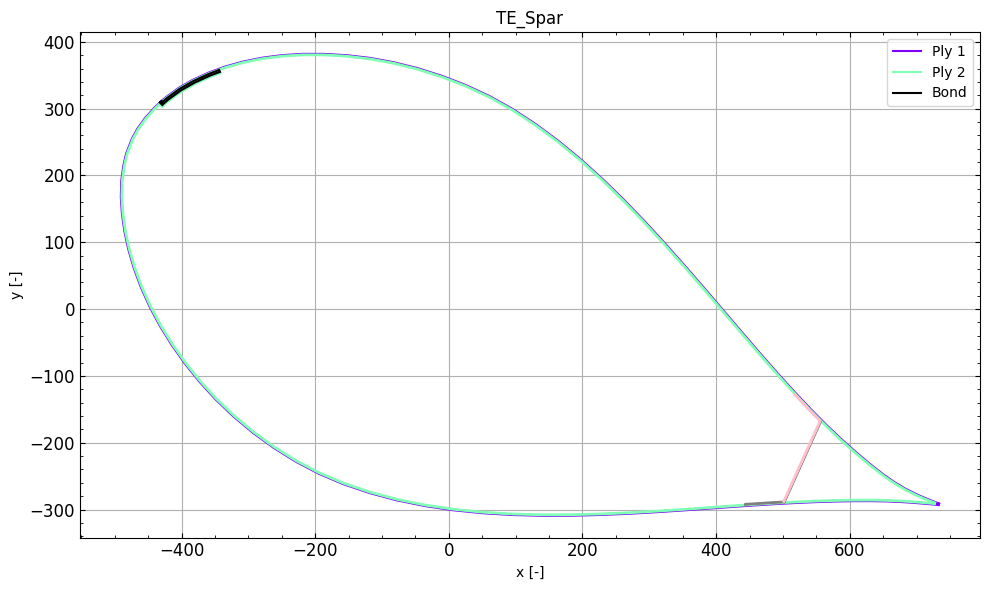

In [14]:
print(sections[2].info())
sections[2].figs['TE_spar']